#### Load and Quick Overview

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ethiopia_agri_data.csv') 

# Basic info
print("Dataset Shape:", df.shape)
print("\nColumns and Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nFirst 5 rows:\n", df.head())

Dataset Shape: (960, 7)

Columns and Types:
 Year                      int64
Region                   object
Crop_Type                object
Yield_ton_ha            float64
Rainfall_mm             float64
Fertilizer_Use_kg_ha    float64
Market_Access_Index     float64
dtype: object

Missing Values:
 Year                    0
Region                  0
Crop_Type               0
Yield_ton_ha            0
Rainfall_mm             0
Fertilizer_Use_kg_ha    0
Market_Access_Index     0
dtype: int64

First 5 rows:
    Year  Region Crop_Type  Yield_ton_ha  Rainfall_mm  Fertilizer_Use_kg_ha  \
0  2000  Amhara      Teff          2.76       1387.7                  94.0   
1  2000  Amhara     Wheat          3.50       1366.1                  50.6   
2  2000  Amhara     Maize          3.39       1292.3                  88.6   
3  2000  Amhara    Barley          3.50       1150.4                 122.2   
4  2000  Amhara   Sorghum          3.25        891.9                 144.1   

   Market_Access_In

#### Descriptive Statistics (National Level)

In [2]:
print("Overall Descriptive Statistics:\n")
print(df.describe().round(2))

print("\nNational Average Yield by Crop:")
print(df.groupby('Crop_Type')['Yield_ton_ha'].mean().round(2).sort_values(ascending=False))

print("\nNational Average Yield by Region:")
print(df.groupby('Region')['Yield_ton_ha'].mean().round(2).sort_values(ascending=False))

Overall Descriptive Statistics:

          Year  Yield_ton_ha  Rainfall_mm  Fertilizer_Use_kg_ha  \
count   960.00        960.00       960.00                960.00   
mean   2011.50          2.95      1187.24                105.02   
std       6.93          0.75       502.56                 39.83   
min    2000.00          1.00       204.00                 20.30   
25%    2005.75          2.47       827.35                 74.78   
50%    2011.50          3.50      1220.90                102.00   
75%    2017.25          3.50      1496.42                137.43   
max    2023.00          3.50      2396.30                199.30   

       Market_Access_Index  
count               960.00  
mean                  0.73  
std                   0.15  
min                   0.31  
25%                   0.63  
50%                   0.75  
75%                   0.84  
max                   1.00  

National Average Yield by Crop:
Crop_Type
Maize      3.14
Sorghum    3.03
Wheat      2.92
Barley     

#### 3: Correlation Analysis (Key Drivers)

Correlation Matrix:
                       Year  Yield_ton_ha  Rainfall_mm  Fertilizer_Use_kg_ha  \
Year                  1.00          0.01         0.00                 -0.02   
Yield_ton_ha          0.01          1.00         0.77                  0.64   
Rainfall_mm           0.00          0.77         1.00                  0.65   
Fertilizer_Use_kg_ha -0.02          0.64         0.65                  1.00   
Market_Access_Index   0.02          0.52         0.30                  0.36   

                      Market_Access_Index  
Year                                 0.02  
Yield_ton_ha                         0.52  
Rainfall_mm                          0.30  
Fertilizer_Use_kg_ha                 0.36  
Market_Access_Index                  1.00  


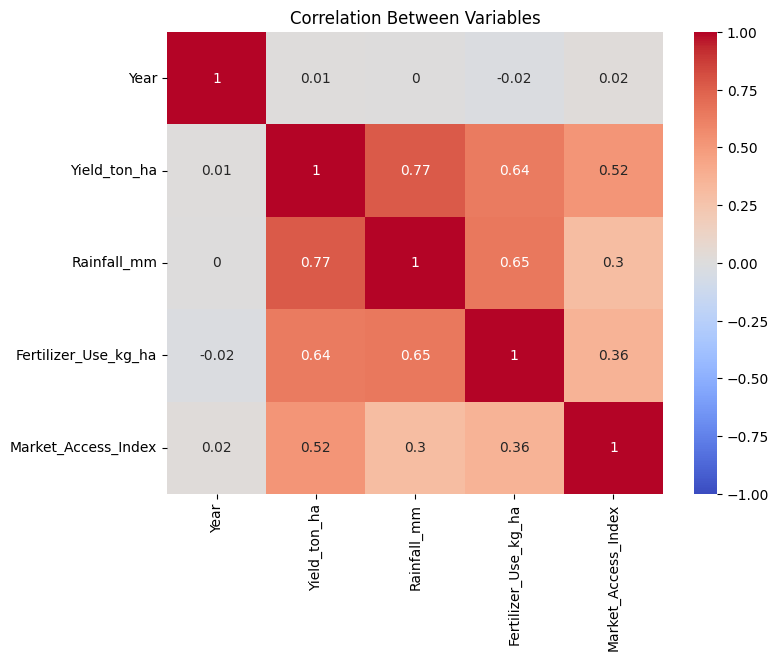

In [3]:
# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation matrix
corr = numeric_df.corr().round(2)
print("Correlation Matrix:\n", corr)

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Variables')
plt.show()

#### Regional Yield Comparison (Bar Plot)

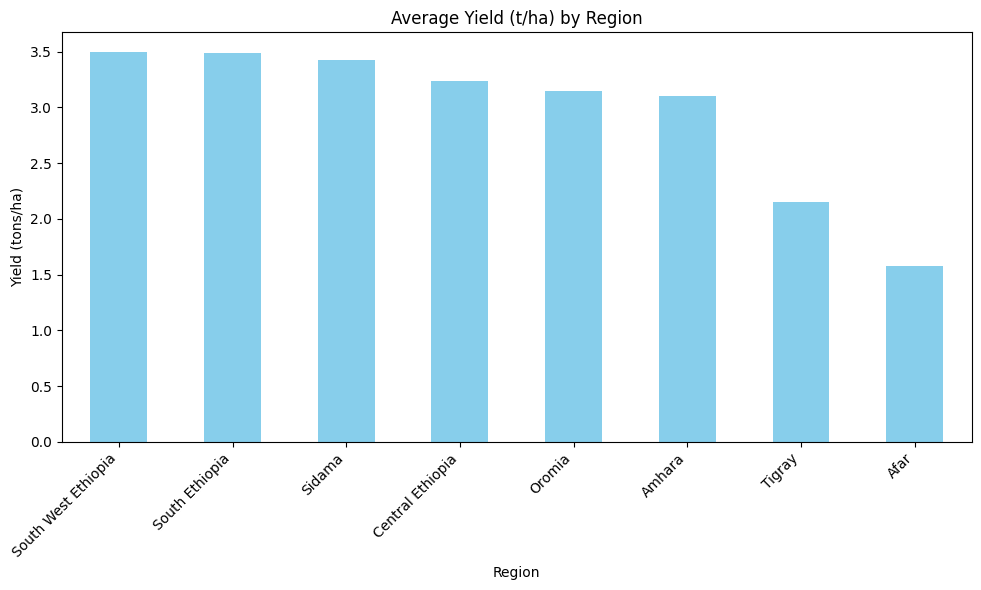

<Figure size 640x480 with 0 Axes>

In [4]:
# Average yield by region
region_yield = df.groupby('Region')['Yield_ton_ha'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
region_yield.plot(kind='bar', color='skyblue')
plt.title('Average Yield (t/ha) by Region')
plt.ylabel('Yield (tons/ha)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.savefig('region_yield_bar.png')

#### Crop Yield by Region (Grouped Bar or Heatmap)

Average Yield by Region and Crop:
 Crop_Type            Barley  Maize  Sorghum  Teff  Wheat
Region                                                  
Afar                   1.48   1.92     1.68  1.32   1.47
Amhara                 2.90   3.29     3.30  3.04   2.97
Central Ethiopia       3.08   3.42     3.34  3.10   3.24
Oromia                 2.95   3.40     3.29  2.97   3.11
Sidama                 3.43   3.50     3.47  3.30   3.42
South Ethiopia         3.49   3.50     3.50  3.46   3.48
South West Ethiopia    3.50   3.50     3.50  3.49   3.50
Tigray                 1.91   2.55     2.18  1.95   2.16


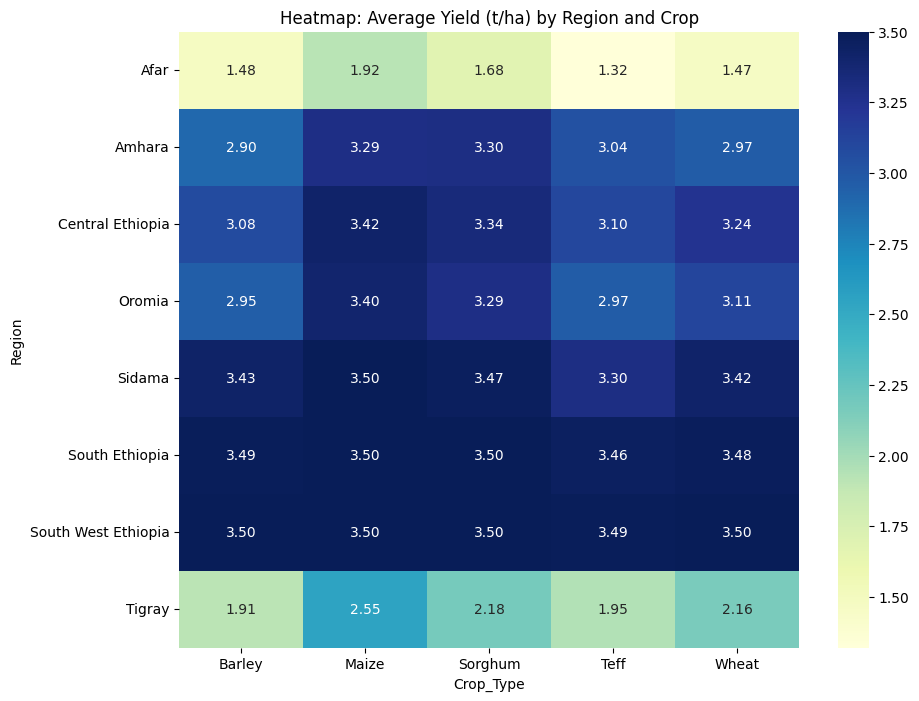

<Figure size 640x480 with 0 Axes>

In [5]:
# Pivot for crop × region
crop_region_yield = df.pivot_table(values='Yield_ton_ha', index='Region', columns='Crop_Type', aggfunc='mean').round(2)

print("Average Yield by Region and Crop:\n", crop_region_yield)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(crop_region_yield, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Heatmap: Average Yield (t/ha) by Region and Crop')
plt.show()

plt.savefig('crop_region_heatmap.png')

#### Trend Over Time (National Yield Trend Line)

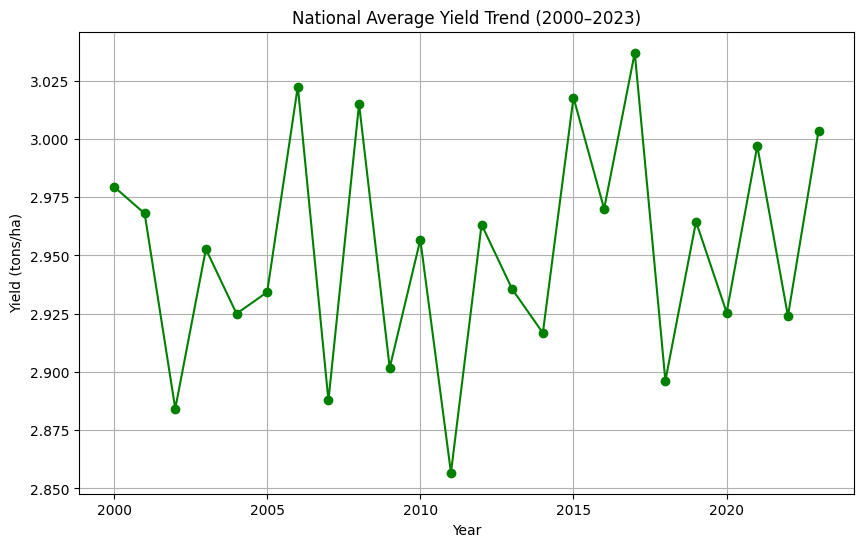

<Figure size 640x480 with 0 Axes>

In [6]:
# National average yield per year
yearly_yield = df.groupby('Year')['Yield_ton_ha'].mean()

plt.figure(figsize=(10, 6))
yearly_yield.plot(kind='line', marker='o', color='green')
plt.title('National Average Yield Trend (2000–2023)')
plt.ylabel('Yield (tons/ha)')
plt.xlabel('Year')
plt.grid(True)
plt.show()

plt.savefig('national_yield_trend.png')

#### Identify Problem Areas (Lowest Performing)

In [7]:
# 10 lowest yield records (highlight bottlenecks)
lowest_yields = df.nsmallest(10, 'Yield_ton_ha')[['Year', 'Region', 'Crop_Type', 'Yield_ton_ha', 'Rainfall_mm', 'Fertilizer_Use_kg_ha', 'Market_Access_Index']]
print("10 Lowest Yield Records (Potential Problem Cases):\n", lowest_yields)

# Regions with lowest average rainfall
low_rain_regions = df.groupby('Region')['Rainfall_mm'].mean().sort_values().round(1)
print("\nRegions by Average Rainfall (Lowest First):\n", low_rain_regions)

10 Lowest Yield Records (Potential Problem Cases):
      Year Region Crop_Type  Yield_ton_ha  Rainfall_mm  Fertilizer_Use_kg_ha  \
20   2000   Afar      Teff          1.00        368.5                  22.0   
100  2002   Afar      Teff          1.00        398.8                  31.5   
700  2017   Afar      Teff          1.00        382.4                  23.8   
900  2022   Afar      Teff          1.00        204.2                  77.2   
61   2001   Afar     Wheat          1.01        409.0                  28.9   
263  2006   Afar    Barley          1.02        438.0                  50.5   
181  2004   Afar     Wheat          1.03        498.1                  23.7   
260  2006   Afar      Teff          1.03        361.2                  73.2   
103  2002   Afar    Barley          1.05        411.5                  47.7   
820  2020   Afar      Teff          1.05        410.1                  44.8   

     Market_Access_Index  
20                  0.31  
100                 0.40

#### Exploratory Data Analysis (EDA) – Key Insights & Problem Identification

**Project Context**: Dataset of Ethiopian agricultural productivity (2000–2023) across 8 regions, 5 major crops, with climate-adjusted rainfall, fertilizer use, and market access.

**Dataset Size**: 960 observations (24 years × 8 regions × 5 crops)

## 1. Overall Descriptive Statistics
- **National Averages**:
  - Yield: **2.95 t/ha** (range: 1.00 – 3.50 t/ha)
  - Rainfall: **1,187 mm/year** (range: 204 – 2,396 mm)
  - Fertilizer Use: **105 kg/ha** (range: 20 – 199 kg/ha)
  - Market Access Index: **0.73** (range: 0.31 – 1.00)

- Strong variation in rainfall and inputs reflects Ethiopia's diverse agro-ecological zones.

## 2. National Average Yield by Crop (t/ha)
- Maize:     **3.14** (highest – thrives in wetter conditions)
- Sorghum:   **3.03**
- Wheat:     **2.92**
- Barley:    **2.84**
- Teff:      **2.83** (lowest – more sensitive to poor conditions)

**Observation**: Maize leads nationally, but Teff (a staple crop) lags — indicating potential vulnerability for food security.

## 3. National Average Yield by Region (t/ha)
| Rank | Region                | Avg Yield (t/ha) | % from National Avg (2.95) |
|------|-----------------------|------------------|----------------------------|
| 1    | South West Ethiopia   | **3.50**        | +18.6%                    |
| 2    | South Ethiopia        | **3.49**        | +18.3%                    |
| 3    | Sidama                | **3.43**        | +16.3%                    |
| 4    | Central Ethiopia      | **3.23**        | +9.5%                     |
| 5    | Oromia                | **3.14**        | +6.4%                     |
| 6    | Amhara                | **3.10**        | +5.1%                     |
| 7    | Tigray                | **2.15**        | -27.1%                    |
| 8    | Afar                  | **1.57**        | -46.8%                    |

**Key Gap**: Southern/wetter regions (South West, South Ethiopia, Sidama) consistently near the 3.5 t/ha cap, while northern/drier regions (Afar, Tigray) are **30–47% below** national average — and Afar is **~55% below** the best-performing region (South West Ethiopia).

## 4. Correlation Matrix – Key Drivers of Yield
| Variable                | Correlation with Yield_ton_ha |
|-------------------------|-------------------------------|
| Rainfall_mm             | **+0.77** (strongest driver) |
| Fertilizer_Use_kg_ha    | **+0.64**                    |
| Market_Access_Index     | **+0.52**                    |
| Year                    | ~0.01 (no time trend)        |

**Interpretation**:
- Rainfall is the dominant factor (climate vulnerability).
- Fertilizer and market access also strongly positive → limited input adoption and poor market linkages are major bottlenecks.
- No significant yield growth over 2000–2023 in this dataset (mirrors real stagnation in Ethiopian smallholder productivity without major interventions).

## 5. Yield Heatmap Insights (Average t/ha by Region & Crop)
- **Southern regions** (South West Ethiopia, South Ethiopia, Sidama): All crops near or at **3.4–3.5 t/ha** ceiling — optimal rain-fed conditions.
- **Highland regions** (Amhara, Oromia, Central Ethiopia): Solid performance (~2.9–3.4 t/ha), with Maize/Sorghum strongest.
- **Northern/dry regions** (Afar, Tigray):
  - Afar: All crops **1.3–1.9 t/ha** (Teff worst at 1.32)
  - Tigray: **1.9–2.6 t/ha** (Maize best at 2.55, Teff/Barley weakest)

**Crop patterns**: Maize and Sorghum perform relatively better in challenging conditions (drought tolerance), while Teff struggles most in dry/low-input areas.

## Key Problems Identified for Ethiopia's Agriculture
1. **Severe Regional Disparity Driven by Climate**  
   Afar and Tigray suffer **~30–55% lower yields** than southern regions — directly linked to low rainfall (arid/semi-arid zones). This exacerbates food insecurity and poverty in already vulnerable areas.

2. **Limited Input Adoption & Market Access**  
   Strong positive correlations (Fertilizer 0.64, Market 0.52) show that low fertilizer use and poor market linkages suppress yields, especially in northern regions.

3. **Stagnant National Productivity**  
   No meaningful upward trend over 24 years — despite population growth, this highlights systemic barriers (climate risk, input constraints, extension services gaps).

4. **Crop-Specific Vulnerabilities**  
   Teff (national staple) underperforms in dry/low-rain areas → risks to household food security and cultural diets.